<a href="https://colab.research.google.com/github/Amrithya/Sub-Divisional-Monthly-Rainfall/blob/main/Sub_Divisional_Monthly_Rainfall_from_1901_to_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**:

Did you know that India is a country with diverse weather conditions? The climate of India consists of a wide range of weather conditions across a vast geographic scale and varied topography. With the diversity in weather conditions, the most anticipated season in India is the monsoon. Rain is of immense importance in India due to its significant impact on various aspects of the country's environment, agriculture, economy, and culture. Here are some key reasons why rain is crucial in India. India heavily depends on agriculture, and hence, rainfall plays a major role in the Indian economy. Rainfall doesn't always bring joy; sometimes, it's miserable. India is highly vulnerable to tropical cyclones in the basin, from the east or the west. On average, 2 or 3 tropical cyclones make landfall in India each year, with about one being a severe tropical cyclone or greater. So, it's very important to study rainfall in India.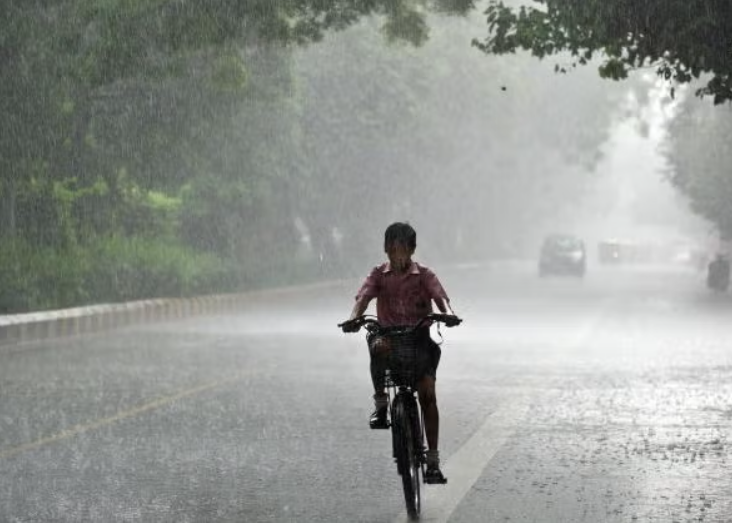


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.stats import ttest_1samp
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('Sub_Division_IMD_2017.csv')
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [5]:
list(df.columns.values)

['SUBDIVISION',
 'YEAR',
 'JAN',
 'FEB',
 'MAR',
 'APR',
 'MAY',
 'JUN',
 'JUL',
 'AUG',
 'SEP',
 'OCT',
 'NOV',
 'DEC',
 'ANNUAL',
 'JF',
 'MAM',
 'JJAS',
 'OND']

In [6]:
years = df['YEAR'].transpose().values
january = df['JAN'].transpose().values
february = df['FEB'].transpose().values
march = df['MAR'].transpose().values
april = df['APR'].transpose().values
may = df['MAY'].transpose().values
june = df['JUN'].transpose().values
july = df['JUL'].transpose().values
august = df['AUG'].transpose().values
september = df['SEP'].transpose().values
october = df['OCT'].transpose().values
november = df['NOV'].transpose().values
december = df['DEC'].transpose().values
annual = df['ANNUAL'].transpose().values

janfeb = df['JF'].transpose().values
marmay = df['MAM'].transpose().values
junsep = df['JJAS'].transpose().values
octdec = df['OND'].transpose().values

print(years)
print(january)
print(february)


[1901 1902 1903 ... 2015 2016 2017]
[49.2  0.  12.7 ...  2.2 59.6 21.3]
[ 87.1 159.8 144.  ...   0.5  12.1   0.9]


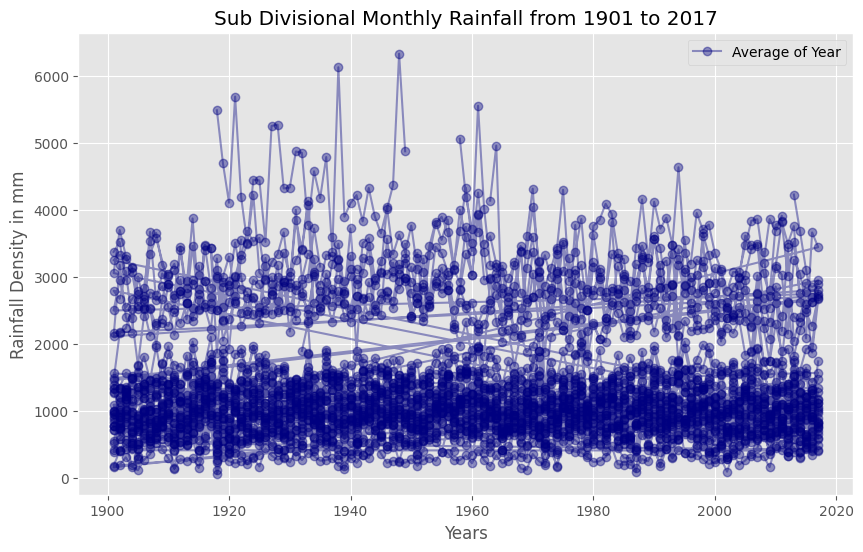

In [7]:
plt.style.use('ggplot')
plt.figure()
plt.plot(years, annual, '-o', c='navy', alpha=0.4)
plt.xlabel('Years')
plt.ylabel('Rainfall Density in mm')
plt.title('Sub Divisional Monthly Rainfall from 1901 to 2017')
plt.legend(['Average of Year'])

<ipython-input-8-0d259b189604>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(years, janfeb, cmap=cmap)
<ipython-input-8-0d259b189604>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(years, marmay, cmap=cmap)
<ipython-input-8-0d259b189604>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(years, junsep, cmap=cmap)
<ipython-input-8-0d259b189604>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(years, octdec, cmap=cmap)


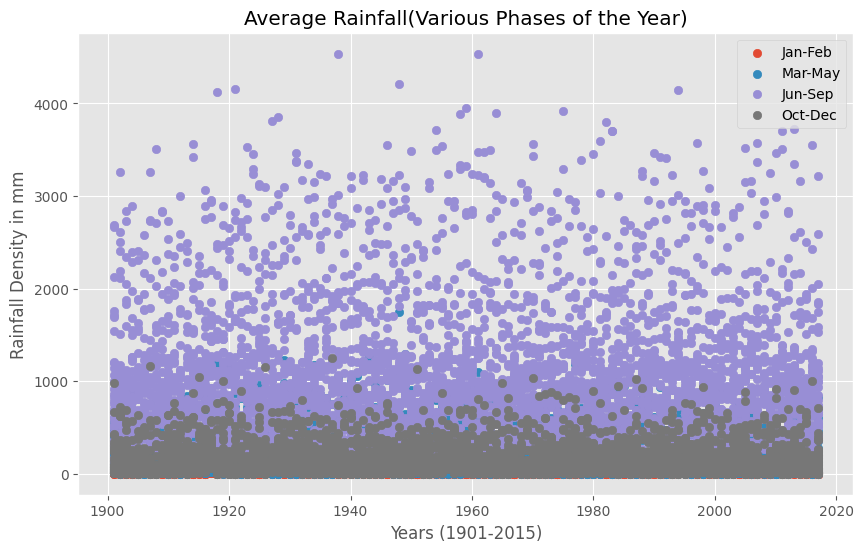

In [8]:
cmap = matplotlib.cm.viridis
plt.figure()
plt.scatter(years, janfeb, cmap=cmap)
plt.scatter(years, marmay, cmap=cmap)
plt.scatter(years, junsep, cmap=cmap)
plt.scatter(years, octdec, cmap=cmap)
plt.xlabel('Years (1901-2015)')
plt.ylabel('Rainfall Density in mm')
plt.title('Average Rainfall(Various Phases of the Year)')
plt.legend(['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec'])

Text(0, 0.5, 'Av. Rainfall in mm')

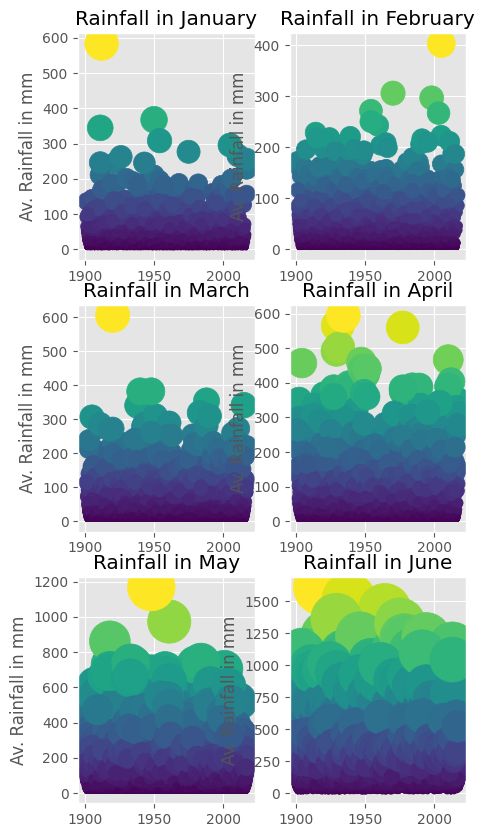

In [9]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, sharex=False, sharey=False, figsize=(5,10))

ax2.scatter(years, february, c=february, s=february)
ax2.set_title("Rainfall in February")
ax2.set_ylabel('Av. Rainfall in mm')

ax1.scatter(years, january, c=january, s=january)
ax1.set_title("Rainfall in January")
ax1.set_ylabel('Av. Rainfall in mm')

ax3.scatter(years, march, c=march, s=march)
ax3.set_title("Rainfall in March")
ax3.set_ylabel('Av. Rainfall in mm')

ax4.scatter(years, april, c=april, s=april)
ax4.set_title("Rainfall in April")
ax4.set_ylabel('Av. Rainfall in mm')

ax5.scatter(years, may, c=may, s=may)
ax5.set_title("Rainfall in May")
ax5.set_ylabel('Av. Rainfall in mm')

ax6.scatter(years, june, c=june, s=june)
ax6.set_title("Rainfall in June")
ax6.set_ylabel('Av. Rainfall in mm')


Text(0, 0.5, 'Av. Rainfall in mm')

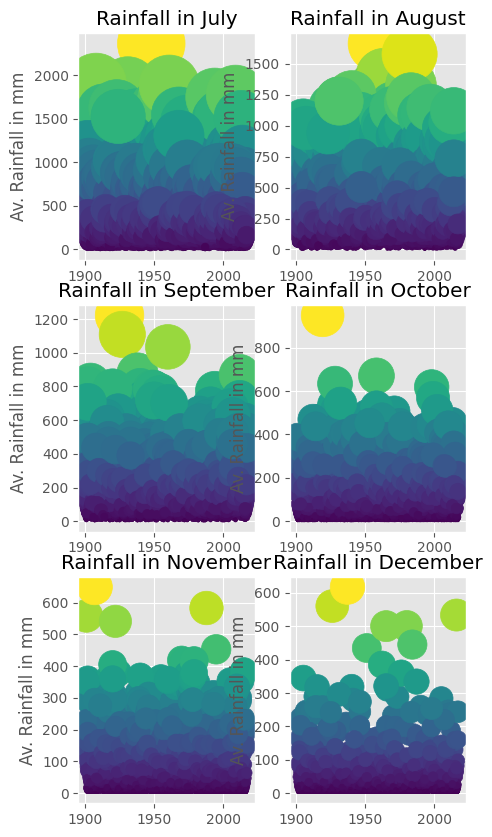

In [10]:
fig, ((ax7,ax8),(ax9,ax10),(ax11,ax12)) = plt.subplots(3, 2, sharex=False, sharey=False, figsize=(5,10))
ax7.scatter(years, july, c=july, s=july)
ax7.set_title("Rainfall in July")
ax7.set_ylabel('Av. Rainfall in mm')

ax8.scatter(years, august, c=august, s=august)
ax8.set_title("Rainfall in August")
ax8.set_ylabel('Av. Rainfall in mm')

ax9.scatter(years, september, c=september, s=september)
ax9.set_title("Rainfall in September")
ax9.set_ylabel('Av. Rainfall in mm')

ax10.scatter(years, october, c=october, s=october)
ax10.set_title("Rainfall in October")
ax10.set_ylabel('Av. Rainfall in mm')

ax11.scatter(years, november, c=november, s=november)
ax11.set_title("Rainfall in November")
ax11.set_ylabel('Av. Rainfall in mm')


ax12.scatter(years, december, c=december, s=december)
ax12.set_title("Rainfall in December")
ax12.set_ylabel('Av. Rainfall in mm')

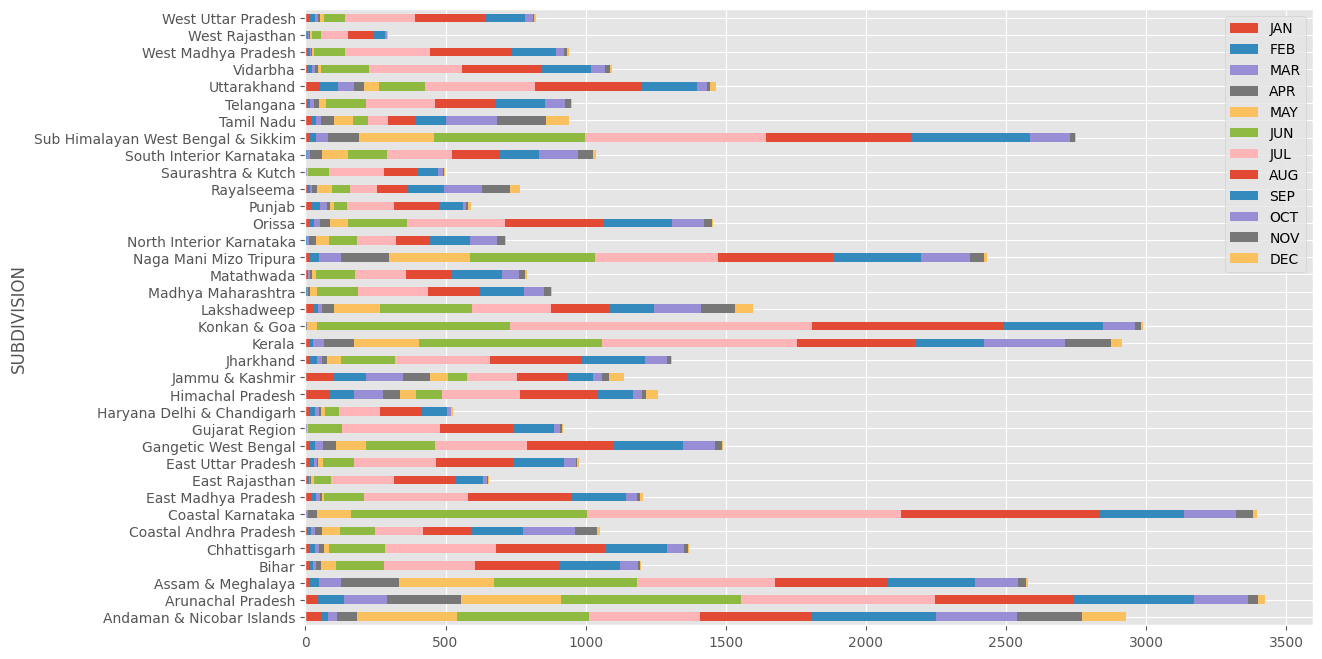

In [11]:
df[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));

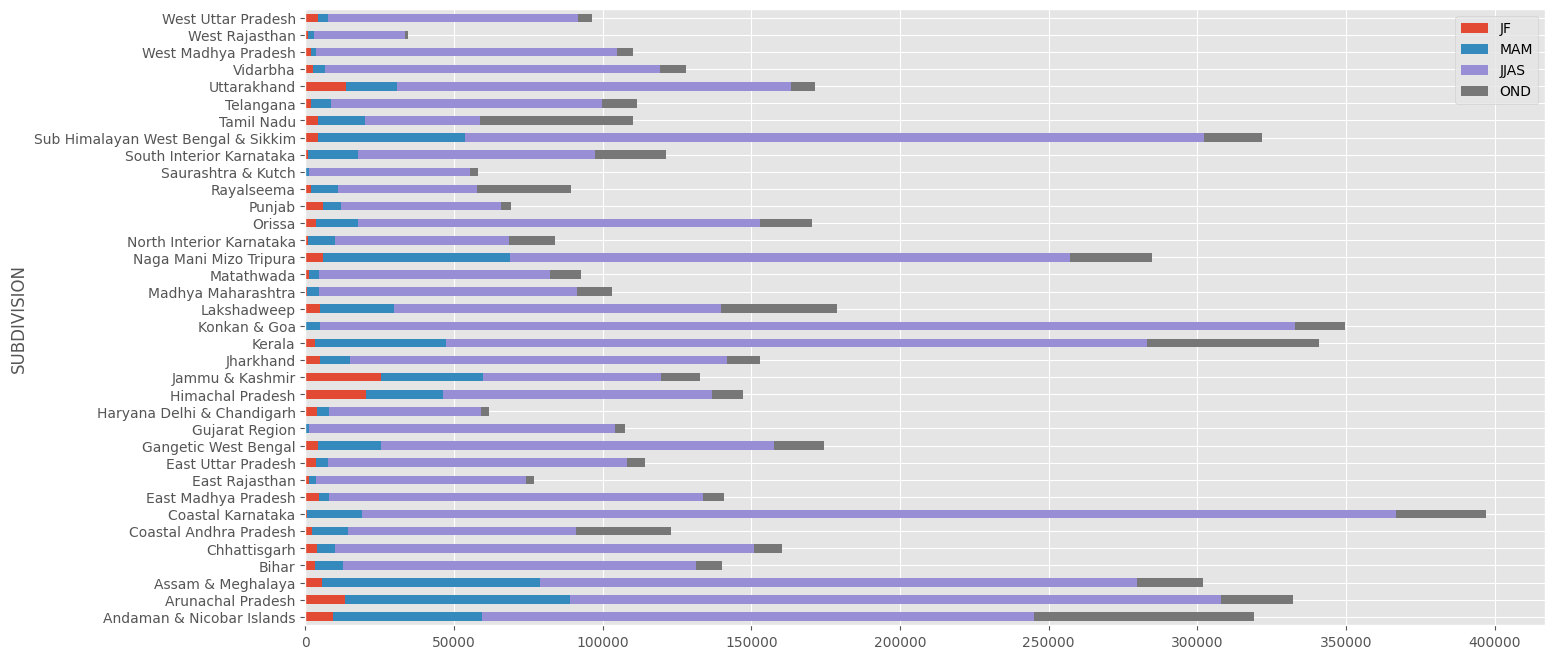

In [12]:
df[['SUBDIVISION', 'JF', 'MAM',
       'JJAS', 'OND']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(16,8));

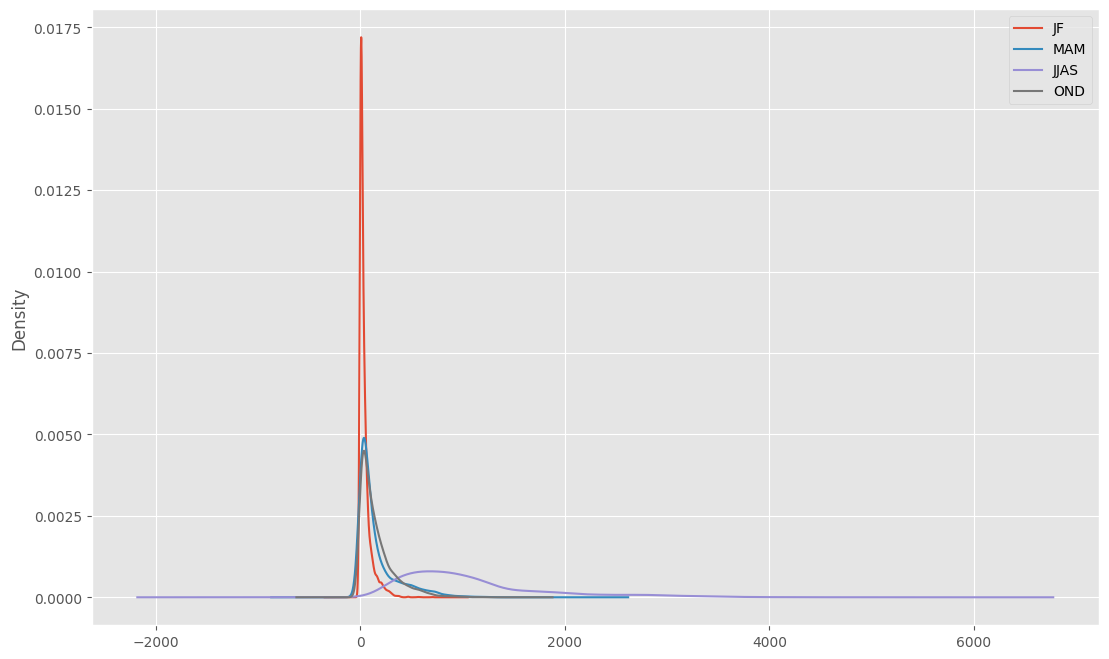

In [13]:
df[['SUBDIVISION', 'JF', 'MAM',
       'JJAS', 'OND']].plot(kind="kde",figsize=(13,8));

In [14]:
groups = df.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']
tn_data=groups.get_group(('Tamil Nadu'))
tn_data.head()

<ipython-input-14-07df23f55f6b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groups = df.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
3487,1901,24.5,39.1,21.7,36.0,74.0,41.8,49.3,67.9,191.1,212.3,80.4
3488,1902,67.2,9.8,25.1,21.9,84.7,39.3,55.1,113.8,98.6,174.9,165.8
3489,1903,19.3,7.8,1.7,18.2,128.5,58.5,72.6,115.0,210.4,200.5,203.2
3490,1904,35.2,0.1,0.7,19.5,121.9,34.9,89.0,40.4,85.7,23.6,49.1
3491,1905,6.5,7.5,17.2,64.8,83.7,49.8,39.0,101.8,73.5,123.7,3.2


In [15]:
tn_data=tn_data.melt(['YEAR']).reset_index()
tn_data.head()

,index,YEAR,variable,value
0,0,1901,JAN,24.5
1,1,1902,JAN,67.2
2,2,1903,JAN,19.3
3,3,1904,JAN,35.2
4,4,1905,JAN,6.5


In [16]:
df= tn_data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,24.5
117,117,1901,FEB,39.1
234,234,1901,MAR,21.7
351,351,1901,APR,36.0
468,468,1901,MAY,74.0


In [17]:
df.columns=['INDEX','YEAR','Month','avg_rainfall']
df.head()

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,JAN,24.5
117,117,1901,FEB,39.1
234,234,1901,MAR,21.7
351,351,1901,APR,36.0
468,468,1901,MAY,74.0


In [18]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)
df.head(12)

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,1,24.5
117,117,1901,2,39.1
234,234,1901,3,21.7
351,351,1901,4,36.0
468,468,1901,5,74.0
585,585,1901,6,41.8
702,702,1901,7,49.3
819,819,1901,8,67.9
936,936,1901,9,191.1
1053,1053,1901,11,212.3


In [19]:
df['Date']=pd.to_datetime(df.assign(Day=1).loc[:,['YEAR','Month','Day']])
df.head(12)

,INDEX,YEAR,Month,avg_rainfall,Date
0,0,1901,1,24.5,1901-01-01
117,117,1901,2,39.1,1901-02-01
234,234,1901,3,21.7,1901-03-01
351,351,1901,4,36.0,1901-04-01
468,468,1901,5,74.0,1901-05-01
585,585,1901,6,41.8,1901-06-01
702,702,1901,7,49.3,1901-07-01
819,819,1901,8,67.9,1901-08-01
936,936,1901,9,191.1,1901-09-01
1053,1053,1901,11,212.3,1901-11-01


In [20]:
cols=['avg_rainfall']
dataset=df[cols]
dataset.head()

,avg_rainfall
0,24.5
117,39.1
234,21.7
351,36.0
468,74.0


In [21]:
series=dataset
series.head()

,avg_rainfall
0,24.5
117,39.1
234,21.7
351,36.0
468,74.0


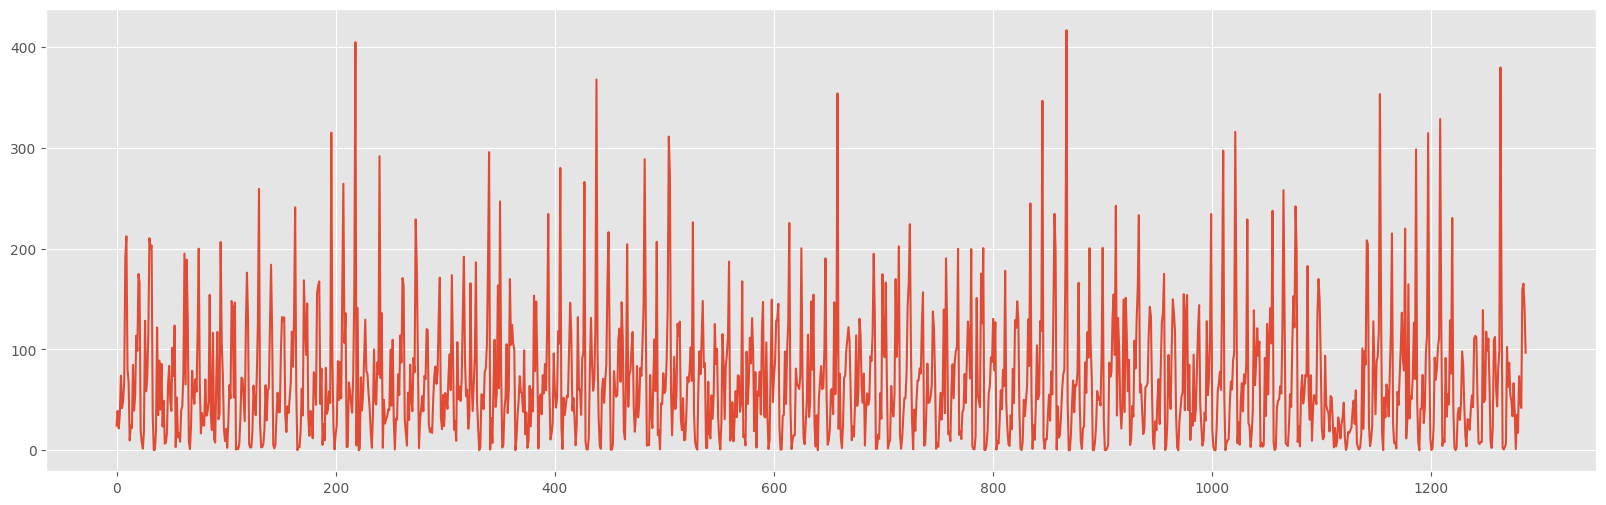

In [22]:
plt.figure(figsize=(20,6))
plt.plot(series.values)
plt.show()

In [23]:
# Get the raw data values from the pandas data frame.
data_raw = series.values.astype("float32")

# We apply the MinMax scaler from sklearn
# to normalize data in the (0, 1) interval.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)

# Print a few values.
dataset[0:5]

array([[0.0587953 ],
       [0.09383249],
       [0.05207584],
       [0.08639309],
       [0.1775858 ]], dtype=float32)

In [24]:
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1029, 258)


In [26]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [27]:
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(1027, 1)
New training data shape:
(1027, 1, 1)


In [28]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()

    model.add(LSTM(2000,activation = 'tanh', input_shape = (1, window_size)))
    model.add(Dropout(0.2))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(400))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = "mean_squared_error",
                  optimizer = "adam")
    model.fit(train_X,
              train_Y,
              epochs = 10,
              batch_size = 64,
              )

    return(model)

import math
model1 = fit_model(train_X, train_Y, window_size)
def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Epoch 1/10
17/17 [==============================] - 11s 481ms/step - loss: 0.0256
Epoch 2/10
17/17 [==============================] - 9s 502ms/step - loss: 0.0211
Epoch 3/10
17/17 [==============================] - 9s 530ms/step - loss: 0.0215
Epoch 4/10
17/17 [==============================] - 7s 429ms/step - loss: 0.0219
Epoch 5/10
17/17 [==============================] - 9s 525ms/step - loss: 0.0214
Epoch 6/10
17/17 [==============================] - 7s 428ms/step - loss: 0.0224
Epoch 7/10
17/17 [==============================] - 9s 522ms/step - loss: 0.0213
Epoch 8/10
17/17 [==============================] - 10s 567ms/step - loss: 0.0224
Epoch 9/10
17/17 [==============================] - 8s 453ms/step - loss: 0.0212
Epoch 10/10
8/8 [==============================] - 1s 66ms/step
Training data score: 61.19 RMSE
Test data score: 65.33 RMSE


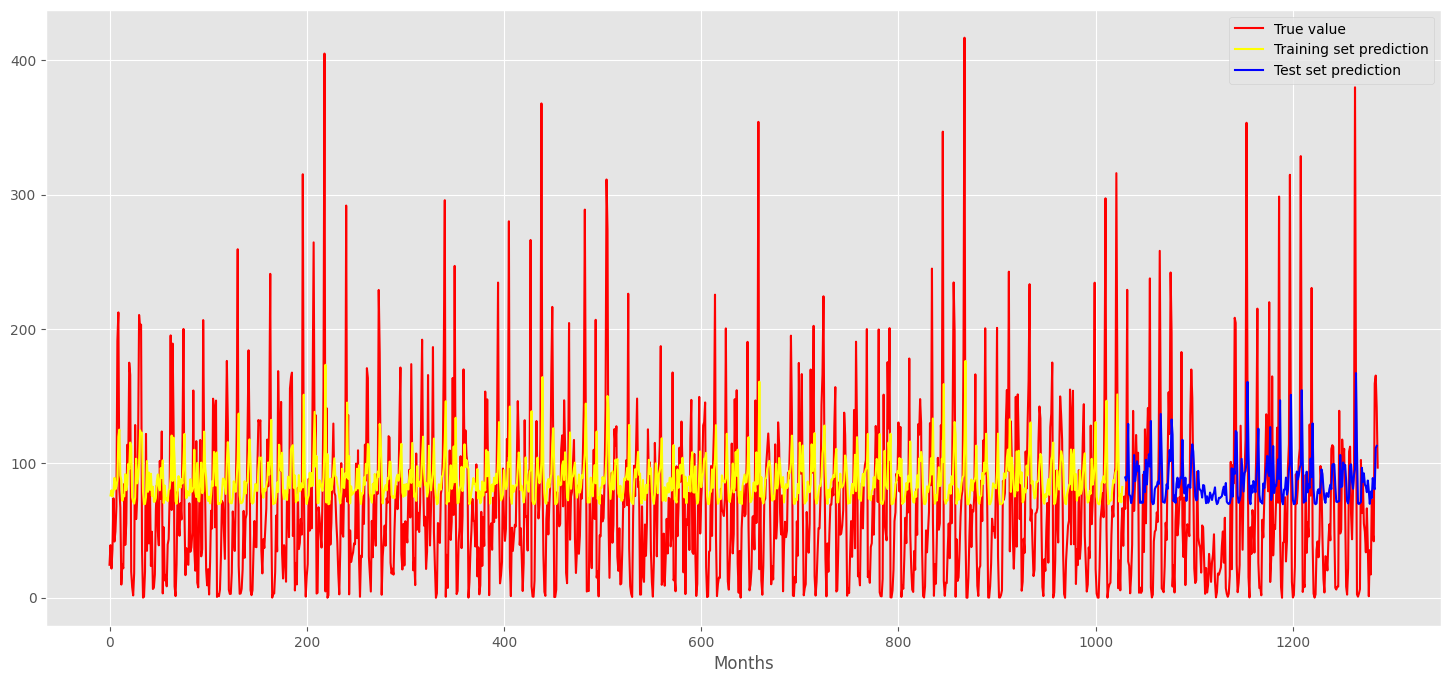

In [29]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
plt.figure(figsize = (18, 8))
plt.plot(scaler.inverse_transform(dataset), label = "True value",color='red')
plt.plot(train_predict_plot, label = "Training set prediction",color='yellow')
plt.plot(test_predict_plot, label = "Test set prediction",color='blue')
plt.xlabel("Months")


plt.legend()
plt.show()

In [30]:
test_predict


array([[ 89.5214  ],
       [ 87.09928 ],
       [ 91.8602  ],
       [129.34209 ],
       [ 76.754555],
       [ 75.90429 ],
       [ 70.44417 ],
       [ 74.01579 ],
       [ 80.07063 ],
       [106.16738 ],
       [ 86.70393 ],
       [ 92.516396],
       [101.511734],
       [ 94.4306  ],
       [ 98.067535],
       [ 70.550934],
       [ 71.59133 ],
       [ 70.52424 ],
       [ 70.89781 ],
       [ 93.775375],
       [ 78.6126  ],
       [102.60566 ],
       [ 84.27654 ],
       [ 99.24275 ],
       [106.7384  ],
       [ 97.57101 ],
       [131.50609 ],
       [ 71.61801 ],
       [ 69.61652 ],
       [ 70.17724 ],
       [ 80.73284 ],
       [ 82.63812 ],
       [ 82.95539 ],
       [ 86.41395 ],
       [ 84.54061 ],
       [100.18212 ],
       [136.70937 ],
       [105.18046 ],
       [ 71.404655],
       [ 71.084564],
       [ 70.65768 ],
       [ 75.85113 ],
       [ 84.38219 ],
       [ 80.997635],
       [ 96.4989  ],
       [109.77086 ],
       [101.69412 ],
       [132.6